In [1]:
# initial setup
try:
    # settings colab:
    import google.colab

    ! mkdir -p ../Data
    # los que usan colab deben modificar el token de esta url:    
    ! wget -O ../Data/klout-scores.csv https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M2/CLASE_11_Estadistica_Inferencial/Data/klout-scores.csv?token=AA4GFHKHCDGQ3VHY6XMID6K6YV4TQ
    
except ModuleNotFoundError:    
    # settings local:
    %run "../../../common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.23.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.8.1 already installed
flask=1.0.3 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Estadística Inferencial

## Imports

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

Utilizamos una muestra aleatoria de puntajes de influencia de redes sociales del servicio http://klout.com. 

Klout era un sitio web y una aplicación móvil que utilizaba análisis de redes sociales para calificar usuarios de acuerdo con su influencia social en línea. 

El sitio calculaba un "Klout Score", que era un valor numérico entre 1 y 100 donde puntuaciones más altas correspondian a una mayor "influencia social" en línea.

De una población de más de 620 millones de puntajes obtuvimos una muestra de tamaño 1048

## Leemos los datos

In [3]:
data_klout = pd.read_csv('../Data/klout-scores.csv', header=None, names=['scores'])
data_klout.head()

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


## Ejercicio 1: Intervalos de confianza

Escribir una función que dado los datos como una instancia de Series, un número n_sample, y un valor alpha tome una muestra de los datos de tamaño n y calcule la media muestral y el intervalo de confianza para la media a partir de esa muestra.

$$\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

Usemos esa función para calcular los intervalos de confianza de nivel 95% para las medias de los scores de data_klout en una muestra de tamaño 20 y otra de tamaño 100.


In [4]:
def confidence_interval(data, n_sample, alpha):    

    # muestreo:
    random_generator = np.random.default_rng()
    index_sample = random_generator.choice(data.index, size = n_sample,  replace=False)
    data_sample = data.loc[index_sample]
        
    data_sample_xbar = data_sample.mean()
    
    data_sample_sd = data_sample.std()

    data_sample_se = data_sample_sd / math.sqrt(n_sample)

    critical_value = stats.norm.ppf(alpha / 2) * (-1)

    sample_CI_mean_lower = data_sample_xbar - critical_value * data_sample_se
    sample_CI_mean_upper = data_sample_xbar + critical_value * data_sample_se
        
    return (data_sample_xbar, sample_CI_mean_lower, sample_CI_mean_upper)


In [5]:
mean_ci_20 = confidence_interval(data_klout.scores, n_sample = 20, alpha = 0.05)
mean_ci_20

(39.46170538900001, 33.23075350935582, 45.6926572686442)

In [6]:
mean_ci_100 = confidence_interval(data_klout.scores, n_sample = 100, alpha = 0.05)
mean_ci_100

(37.8185579624, 35.05506657030664, 40.58204935449336)

In [7]:
print(len(data_klout.scores))
data_klout.scores.mean()

1048


37.71905483253817

In [8]:
mean_ci_20_90 = confidence_interval(data_klout.scores, n_sample = 20, alpha = 0.1)
mean_ci_20_90

(32.099059216, 26.29772221812401, 37.90039621387599)

In [9]:
mean_ci_100_90 = confidence_interval(data_klout.scores, n_sample = 100, alpha = 0.1)
mean_ci_100_90

(36.307843043300004, 33.67666261037208, 38.93902347622793)

## Ejercicio 2: Tests sobre una proporción

Fuimos contratados por una empresa de lotería para averiguar la proporción de clientes que compra determinado producto. La firma va a mantener su plan de marketing actual si esta proporción es de 50% o más pero va a triplicar su gasto en publicidad en caso contrario. 

El dataset que vamos a usar es de datos sintéticos (construido por nosotros) usando la función `generar`
https://numpy.org/doc/1.18/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

In [10]:
def generar(trials, p, obs):
    random_generator = np.random.default_rng()
    data = random_generator.binomial(trials, p, obs)
    result = pd.DataFrame(data, columns= ['compra'])
    return result 

<AxesSubplot:>

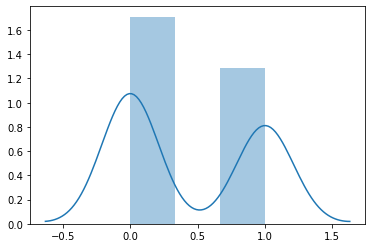

In [11]:
p_generacion = 0.4
trials = 1
obs  = 100
data_ej3 = generar(trials, p_generacion, obs)

sns.distplot(data_ej3)


### 2.1 ¿Cuál es la hipótesis nula y cuál es la alternativa?


$H_{0}$ es la opción más costosa en caso de rechazar equivocadamente, es decir rechazarla cuando $H_{0}$ es verdadera. 

En este caso si le decimos a la firma que su market share es menos del 50% va a invertir mucho dinero en publicidad. 

Por lo tanto definimos 

$H_{0}$ : proporción de clientes que compra es mayor o igual a 50%

$H_{1}$ : proporción de clientes que compra es menor de 50%. 


### 2.2 ¿Cuál es el valor empírico del estimador de la proporción de clientes que compra?

In [12]:
market_share_muestral = data_ej3.compra.sum() / data_ej3.shape[0]
market_share_muestral

0.43

### 2.3 ¿Cuáles son la media y el desvío estándar poblacionales?

Bajo $H_{0}$, es decir suponiendo que $H_{0}$ es verdadera, cada $X_i$ (cada variable que mide si una persona responde si o no a la pregunta de si compra el producto) tiene distribución Bernoulli. 

Bajo $H_{0}$ se cumple $p>=0.5$

Tomemos el valor del parámetro $p$ de la distribución Bernoulli menos favorable a $H_{0}$ dentro de aquellos posibles. 

En este caso entonces 

$E(X_i)=p=0.5$

$V(X_i)=p * (1-p)=0.5*0.5$  

### 2.4  ¿Qué distribución tiene la proporción de clientes que compran determinado producto si asumimos que n es lo suficientemente grande?

Calculamos la proporción de clientes como la media muestral. 

La media muestral es una suma de variables Bernoulli (cada una con iguales parámetros e inpendientes entre sí) dividido el tamaño muestral. 

Si n es "lo suficientemente grande" la media muestral tiene distribución normal con media igual a $E(Xi)$ y  varianza igual a $ V(Xi)/n $. 

Sabemos entonces que asintóticamente la media muestral estandarizada tiene distribucion $N(0,1)$. 

### 2.5 Definamos un test de hipótesis (estadístico de prueba y regla de decisión) para la hipótesis 3.1 con un nivel de significación de 0.05. 

Usamos como estadístico de prueba la media muestral estandarizada del punto anterior. 

Definimos una regla que deja probabilidad $ 0.05 $ de rechazar cuando $ H_0 $ es verdadera. 

Buscamos un valor $ z_{\alpha} $ que deja área $ 0.05 $ en la cola izquierda de una distribución normal estándar (la distribución conocida del estadístico de prueba asumiendo que $ H_0 $ es verdadera). 

Rechazamos $ H_0 $ si el estadístico de prueba resulta por debajo de ese valor de corte. 

### 2.6  ¿Qué decisión tomamos en base a la muestra?

In [13]:
alpha=0.05
z = stats.norm.ppf(alpha)
print(z)

#asumiendo que H0 es verdadera, mu = E(X_i) = 0.5
p = 0.5
mu_H0 = p 
var_H0 = p * (1-p)

estadistico_prueba = (market_share_muestral - mu_H0)/(np.sqrt(var_H0 / obs))
print(estadistico_prueba)

rechazo = (estadistico_prueba < z )
print(rechazo)

print('estadístico prueba:', estadistico_prueba)
print('estadístico z     :', z)
print('rechazo', rechazo)

-1.6448536269514729
-1.4000000000000001
False
estadístico prueba: -1.4000000000000001
estadístico z     : -1.6448536269514729
rechazo False


### 2.7 ¿Cuál es el p-valor?

In [14]:
p_value = stats.norm.cdf(estadistico_prueba)
p_value

0.08075665923377107

### 2.8 Construyamos un intervalo de confianza de 95% para la proporción de clientes que compra.  

In [15]:
var = market_share_muestral * (1-market_share_muestral)
standard_error = np.sqrt(var / obs)

z_nc95 = np.abs(stats.norm.ppf(alpha/2))
print(z_nc95)

li = market_share_muestral - z_nc95 * standard_error
ls = market_share_muestral + z_nc95 * standard_error

print ("El límite inferior del IC al 95% de confianza para p es ", li)
print ("El límite superior del IC al 95% de confianza para p es ", ls)

1.9599639845400545
El límite inferior del IC al 95% de confianza para p es  0.3329669356893161
El límite superior del IC al 95% de confianza para p es  0.5270330643106839


In [16]:
market_share_muestral

0.43